In [31]:
import pandas as pd
import numpy as np
import konlpy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk

In [2]:
law = pd.read_csv('P-GPT_log_에너지조선마케팅실_유태욱.csv')

In [3]:
law.head()

,Unnamed: 0,CreatedDatetime,UserCode,Department,UserQuestion,Model,ResponseTime,Unnamed: 7
0,429,2023-03-07 6:39,79,에너지조선마케팅실,오늘 저녁 메뉴 추천해줘,gpt-3.5,8,1
1,439,2023-03-07 6:40,79,에너지조선마케팅실,포만감이 높으면서 칼로리는 낮은 한식 추천해줘,gpt-3.5,15,1
2,442,2023-03-07 6:41,79,에너지조선마케팅실,니가 추천해준 메뉴를 잘하는 식당을 알려줘 송파 경찰병원역 근처면 좋아,gpt-3.5,15,1
3,462,2023-03-07 6:47,79,에너지조선마케팅실,주소가 다 같은데 상호명만 다르게 하면 다른 식당이야? 똑바로 안해?,gpt-3.5,8,1
4,494,2023-03-07 6:54,79,에너지조선마케팅실,can you recommend best korean restaurant near ...,gpt-3.5,9,1


In [7]:
law['UserCode'].value_counts()

UserCode
203     947
965     217
2385    150
297     122
79      113
3264     37
279      30
473      28
941      26
1780     26
2642     23
1321     21
1372     19
2768     19
3147     18
3168     16
2384     13
2557      9
2457      8
2630      7
2227      6
2949      5
2458      5
2624      3
3253      3
2647      1
830       1
3346      1
Name: count, dtype: int64

In [8]:
law = law.rename(columns = {'Unnamed: 7':'라벨'})

In [9]:
law

,Unnamed: 0,CreatedDatetime,UserCode,Department,UserQuestion,Model,ResponseTime,라벨
0,429,2023-03-07 6:39,79,에너지조선마케팅실,오늘 저녁 메뉴 추천해줘,gpt-3.5,8,1
1,439,2023-03-07 6:40,79,에너지조선마케팅실,포만감이 높으면서 칼로리는 낮은 한식 추천해줘,gpt-3.5,15,1
2,442,2023-03-07 6:41,79,에너지조선마케팅실,니가 추천해준 메뉴를 잘하는 식당을 알려줘 송파 경찰병원역 근처면 좋아,gpt-3.5,15,1
3,462,2023-03-07 6:47,79,에너지조선마케팅실,주소가 다 같은데 상호명만 다르게 하면 다른 식당이야? 똑바로 안해?,gpt-3.5,8,1
4,494,2023-03-07 6:54,79,에너지조선마케팅실,can you recommend best korean restaurant near ...,gpt-3.5,9,1
...,...,...,...,...,...,...,...,...
1869,109897,27:03.0,2385,에너지조선마케팅실,리더로써 업무 비윤리 및 인간존중 등 윤리관련 우수 사항을 작성해주세요.,gpt-3.5,16,2
1870,110646,12:17.0,2642,에너지조선마케팅실,아래 내용 해석해줘.,gpt-3.5,1,4
1871,110648,12:35.0,2642,에너지조선마케팅실,\r\n\r\n\r\n\r\nSl.No.\r\nDocuments\r\nRemark...,gpt-3.5,8,2
1872,110661,21:18.0,2642,에너지조선마케팅실,아래 표 내용 해석해줘.\r\n \r\n\r\n\r\n\r\nl.No.\r\nDoc...,gpt-3.5,15,4


In [13]:
law_top = law[law['UserCode'].isin([203, 965, 2385, 297, 79])]

In [15]:
law_bottom = law[law['UserCode'].isin([2624,3253,2647,830,3346])]

In [16]:
law_top

,Unnamed: 0,CreatedDatetime,UserCode,Department,UserQuestion,Model,ResponseTime,라벨
0,429,2023-03-07 6:39,79,에너지조선마케팅실,오늘 저녁 메뉴 추천해줘,gpt-3.5,8,1
1,439,2023-03-07 6:40,79,에너지조선마케팅실,포만감이 높으면서 칼로리는 낮은 한식 추천해줘,gpt-3.5,15,1
2,442,2023-03-07 6:41,79,에너지조선마케팅실,니가 추천해준 메뉴를 잘하는 식당을 알려줘 송파 경찰병원역 근처면 좋아,gpt-3.5,15,1
3,462,2023-03-07 6:47,79,에너지조선마케팅실,주소가 다 같은데 상호명만 다르게 하면 다른 식당이야? 똑바로 안해?,gpt-3.5,8,1
4,494,2023-03-07 6:54,79,에너지조선마케팅실,can you recommend best korean restaurant near ...,gpt-3.5,9,1
...,...,...,...,...,...,...,...,...
1866,109881,14:47.0,2385,에너지조선마케팅실,"""평소 동료들에 대한 배려를 통해 인간존중을 몸소 실천하고 계십니다.""를 깔끔하게 ...",gpt-3.5,2,1
1867,109882,16:18.0,2385,에너지조선마케팅실,그룹장으로써 타의 모범이 되는 사례를 간략하게 작성해주세요.,gpt-3.5,14,2
1868,109883,17:09.0,2385,에너지조선마케팅실,\r\n그룹장으로써 리더십 관점에서 타의 모범이 되는 사례를 간략하게 작성해주세요.,gpt-3.5,24,2
1869,109897,27:03.0,2385,에너지조선마케팅실,리더로써 업무 비윤리 및 인간존중 등 윤리관련 우수 사항을 작성해주세요.,gpt-3.5,16,2


In [18]:
law_bottom

,Unnamed: 0,CreatedDatetime,UserCode,Department,UserQuestion,Model,ResponseTime,라벨
489,8529,2023-03-16 2:20,830,에너지조선마케팅실,when do you think Russia-Ukraine war finished?,gpt-3.5,3,1
998,39459,2023-03-31 1:32,2624,에너지조선마케팅실,풍력발전의 미래는 뭔가요?,gpt-3.5,11,0
999,39465,2023-03-31 1:33,2624,에너지조선마케팅실,풍력발전용 소재 판매 확대를 위햇서는 어떤 활동이 필요할까요?,gpt-3.5,12,2
1000,39476,2023-03-31 1:37,2624,에너지조선마케팅실,사랑에 쉽게 빠지는 가장 효율적인 방법은 무엇일까요?,gpt-3.5,19,1
1014,40213,2023-03-31 5:43,2647,에너지조선마케팅실,산업안전보건법의 보호대상은 고용 여부와 관계없이 노무를 제공하는 ( ) 사람들은 산...,gpt-3.5,2,2
1470,73505,2023-05-12 5:03,3253,에너지조선마케팅실,Write me a report regarding the acquisition of...,gpt-3.5,13,3
1471,73506,2023-05-12 5:04,3253,에너지조선마케팅실,"Awesp,e",gpt-3.5,1,1
1472,73507,2023-05-12 5:04,3253,에너지조선마케팅실,Awesome I meant,gpt-3.5,469,1
1663,84029,2023-05-31 5:48,3346,에너지조선마케팅실,영어로 생년월일 표기 방법은,gpt-3.5,2,0


In [19]:
law_top = law_top.drop(['Unnamed: 0'], axis = 1)
law_bottom = law_bottom.drop(['Unnamed: 0'], axis = 1)

In [8]:
law2.head()

,CreatedDatetime,UserCode,Department,UserQuestion,Model,ResponseTime,라벨
6,2023-03-07 23:19,193,(포항)품질기술부,파이썬 seaborn 그래프 타입별 그림 보여줘,gpt-3.5,38,5
7,2023-03-07 23:21,193,(포항)품질기술부,seaborn graph picture,gpt-3.5,1,5
8,2023-03-07 23:21,193,(포항)품질기술부,python seabron graph picture,gpt-3.5,6,5
24,2023-03-08 2:38,193,(포항)품질기술부,수치형 데이터 8열 범주형 데이터 2열로 20행 데이터셋 만들어줘,gpt-3.5,46,5
31,2023-03-09 0:02,193,(포항)품질기술부,파이썬 Must have equal len keys and value when se...,gpt-3.5,9,5


In [20]:
law_top['UserQuestion'] = law_top['UserQuestion'].str.replace('[^\w가-힣]', ' ', regex = True)
law_top['UserQuestion']

0                                           오늘 저녁 메뉴 추천해줘
1                               포만감이 높으면서 칼로리는 낮은 한식 추천해줘
2                 니가 추천해준 메뉴를 잘하는 식당을 알려줘 송파 경찰병원역 근처면 좋아
3                  주소가 다 같은데 상호명만 다르게 하면 다른 식당이야  똑바로 안해 
4       can you recommend best korean restaurant near ...
                              ...                        
1866     평소 동료들에 대한 배려를 통해 인간존중을 몸소 실천하고 계십니다  를 깔끔하게 ...
1867                    그룹장으로써 타의 모범이 되는 사례를 간략하게 작성해주세요 
1868           그룹장으로써 리더십 관점에서 타의 모범이 되는 사례를 간략하게 작성해주세요 
1869             리더로써 업무 비윤리 및 인간존중 등 윤리관련 우수 사항을 작성해주세요 
1873                              고객사의 발급 요청 지연  영어로 번역해줘
Name: UserQuestion, Length: 1549, dtype: object

In [21]:
law_bottom['UserQuestion'] = law_bottom['UserQuestion'].str.replace('[^\w가-힣]', ' ', regex = True)
law_bottom['UserQuestion']

489        when do you think Russia Ukraine war finished 
998                                        풍력발전의 미래는 뭔가요 
999                    풍력발전용 소재 판매 확대를 위햇서는 어떤 활동이 필요할까요 
1000                        사랑에 쉽게 빠지는 가장 효율적인 방법은 무엇일까요 
1014    산업안전보건법의 보호대상은 고용 여부와 관계없이 노무를 제공하는     사람들은 산...
1470    Write me a report regarding the acquisition of...
1471                                              Awesp e
1472                                      Awesome I meant
1663                                      영어로 생년월일 표기 방법은
Name: UserQuestion, dtype: object

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\piai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
kkma = konlpy.tag.Kkma()

def mixed_nouns(text):
    # 한글 형태소 분석
    ko_nouns = kkma.nouns(text)
    # 영어 단어 토큰화
    en_nouns = word_tokenize(text)
    # 영어와 한글 결과 병합
    return ko_nouns + en_nouns
nonus_top = law_top['UserQuestion'].apply(mixed_nouns)
nonus_bottom = law_bottom['UserQuestion'].apply(mixed_nouns)

In [39]:
df_word_bottom = pd.DataFrame({'word_bottom' : nonus_bottom})
df_word_bottom['count'] = df_word_bottom['word_bottom'].str.len()
df_word_bottom = df_word_bottom.query('count >= 2')
df_word_bottom

,word_bottom,count
489,"[when, do, you, think, Russia, Ukraine, war, f...",8
998,"[풍력, 풍력발전, 발전, 미래, 가요, 풍력발전의, 미래는, 뭔가요]",8
999,"[풍력, 풍력발전, 발전, 소재, 판매, 확대, 위, 서, 활동, 필요, 풍력발전용...",18
1000,"[사랑, 효율적, 방법, 무엇, 사랑에, 쉽게, 빠지는, 가장, 효율적인, 방법은,...",11
1014,"[산업, 산업안전보건법, 안전, 보건법, 보호, 보호대상, 대상, 고용, 여부, 노...",27
1470,"[Write, me, a, report, regarding, the, acquisi...",25
1471,"[Awesp, e]",2
1472,"[Awesome, I, meant]",3
1663,"[영어, 생년월일, 표기, 방법, 영어로, 생년월일, 표기, 방법은]",8


In [40]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\piai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
stop_words_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
file_path = './stopwords.txt'

# 파일을 열고 각 줄을 리스트에 저장
with open(file_path, 'r', encoding='utf-8') as file:
    lines = [line.strip() for line in file]

# 결과 출력
print(lines)

['1', '2', '3', '4', '5', '가', '가까스로', '가령', '각', '각각', '각자', '각종', '갖고말하자면', '같다', '같이', '개의치않고', '거니와', '거바', '거의', '것', '것과 같이', '것들', '게다가', '게우다', '겨우', '견지에서', '결과에 이르다', '결국', '결론을 낼 수 있다', '겸사겸사', '고려하면', '고로', '곧', '공동으로', '과', '과연', '관계가 있다', '관계없이', '관련이 있다', '관하여', '관한', '관해서는', '구', '구체적으로', '구토하다', '그', '그들', '그때', '그래', '그래도', '그래서', '그러나', '그러니', '그러니까', '그러면', '그러므로', '그러한즉', '그런 까닭에', '그런데', '그런즉', '그럼', '그럼에도 불구하고', '그렇게 함으로써', '그렇지', '그렇지 않다면', '그렇지 않으면', '그렇지만', '그렇지않으면', '그리고', '그리하여', '그만이다', '그에 따르는', '그위에', '그저', '그중에서', '그치지 않다', '근거로', '근거하여', '기대여', '기점으로', '기준으로', '기타', '까닭으로', '까악', '까지', '까지 미치다', '까지도', '꽈당', '끙끙', '끼익', '나', '나머지는', '남들', '남짓', '너', '너희', '너희들', '네', '넷', '년', '논하지 않다', '놀라다', '누가 알겠는가', '누구', '다른', '다른 방면으로', '다만', '다섯', '다소', '다수', '다시 말하자면', '다시말하면', '다음', '다음에', '다음으로', '단지', '답다', '당신', '당장', '대로 하다', '대하면', '대하여', '대해 말하자면', '대해서', '댕그', '더구나', '더군다나', '더라도', '더불어', '더욱더', '더욱이는', '도달하다', '도착하다', '동시에', '동안', '된바에야', '된이상', '두번째로'

In [43]:
stop_word = stop_words_list + lines

In [44]:
stop_word

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
for i in df_word_bottom['word_bottom']:
    for j in i:
        if j in stop_word:
            i.remove(j)

In [47]:
df_word_bottom

,word_bottom,count
489,"[do, think, Russia, Ukraine, war, finished]",8
998,"[풍력, 풍력발전, 발전, 미래, 가요, 풍력발전의, 미래는, 뭔가요]",8
999,"[풍력, 풍력발전, 발전, 소재, 판매, 확대, 위, 서, 활동, 필요, 풍력발전용...",18
1000,"[사랑, 효율적, 방법, 사랑에, 쉽게, 빠지는, 가장, 효율적인, 방법은, 무엇일까요]",11
1014,"[산업, 산업안전보건법, 안전, 보건법, 보호, 보호대상, 대상, 고용, 노무, 제...",27
1470,"[Write, a, report, regarding, acquisition, Dae...",25
1471,"[Awesp, e]",2
1472,"[Awesome, I, meant]",3
1663,"[영어, 생년월일, 표기, 방법, 영어로, 생년월일, 표기, 방법은]",8


In [48]:
df_word_bottom_exploded = df_word_bottom.explode('word_bottom')
df_word_bottom_grouped = df_word_bottom_exploded.groupby('word_bottom', as_index=False).count().sort_values('count', ascending=False)


In [49]:
df_word_bottom_grouped

,word_bottom,count
59,수,2
40,방법은,2
71,표기,2
72,풍력,2
73,풍력발전,2
...,...,...
27,war,1
26,think,1
25,submarines,1
24,runs,1


In [50]:
dic_word = df_word_bottom_grouped.set_index('word_bottom').to_dict()['count']
dic_word

{'수': 2,
 '방법은': 2,
 '표기': 2,
 '풍력': 2,
 '풍력발전': 2,
 '생년월일': 2,
 '발전': 2,
 '방법': 2,
 '고용': 2,
 'Hanwha': 2,
 'Daewoo': 2,
 '소재': 2,
 '판매': 2,
 '산업안전보건법의': 1,
 '서': 1,
 '산업재해로부터': 1,
 '산업재해': 1,
 'Awesome': 1,
 '쉽게': 1,
 '산업': 1,
 '사랑에': 1,
 '사랑': 1,
 '사람들은': 1,
 '사람': 1,
 '산업안전보건법': 1,
 '영어로': 1,
 '안전': 1,
 '풍력발전의': 1,
 '효율적': 1,
 '활동이': 1,
 '활동': 1,
 '확대를': 1,
 '확대': 1,
 '필요할까요': 1,
 '필요': 1,
 '풍력발전용': 1,
 '여부와': 1,
 '제공하는': 1,
 '제공': 1,
 '재해': 1,
 '위햇서는': 1,
 '위': 1,
 '보호받을': 1,
 '영어': 1,
 '빠지는': 1,
 '보호': 1,
 '보호대상은': 1,
 'acquisition': 1,
 'meant': 1,
 'make': 1,
 'industry': 1,
 'finished': 1,
 'easily': 1,
 'e': 1,
 'do': 1,
 'a': 1,
 '보호대상': 1,
 'Write': 1,
 'Ukraine': 1,
 'Shipbuilding': 1,
 'Russia': 1,
 'Ltd': 1,
 'I': 1,
 'Company': 1,
 'military': 1,
 'nuclear': 1,
 'regarding': 1,
 'report': 1,
 'Awesp': 1,
 '보건법': 1,
 '미래는': 1,
 '미래': 1,
 '뭔가요': 1,
 '무엇일까요': 1,
 '대상': 1,
 '노무를': 1,
 '노무': 1,
 '가장': 1,
 '가요': 1,
 'war': 1,
 'think': 1,
 'submarines': 1,
 'runs': 1,
 '효율적인'

In [51]:
  # 여기에 폰트 파일의 경로를 입력하세요.
font_path = 'C:\Windows\WinSxS\amd64_microsoft-windows-f..uetype-malgungothic_31bf3856ad364e35_10.0.19041.1_none_bb40ebfb65874170/malgun.ttf' 

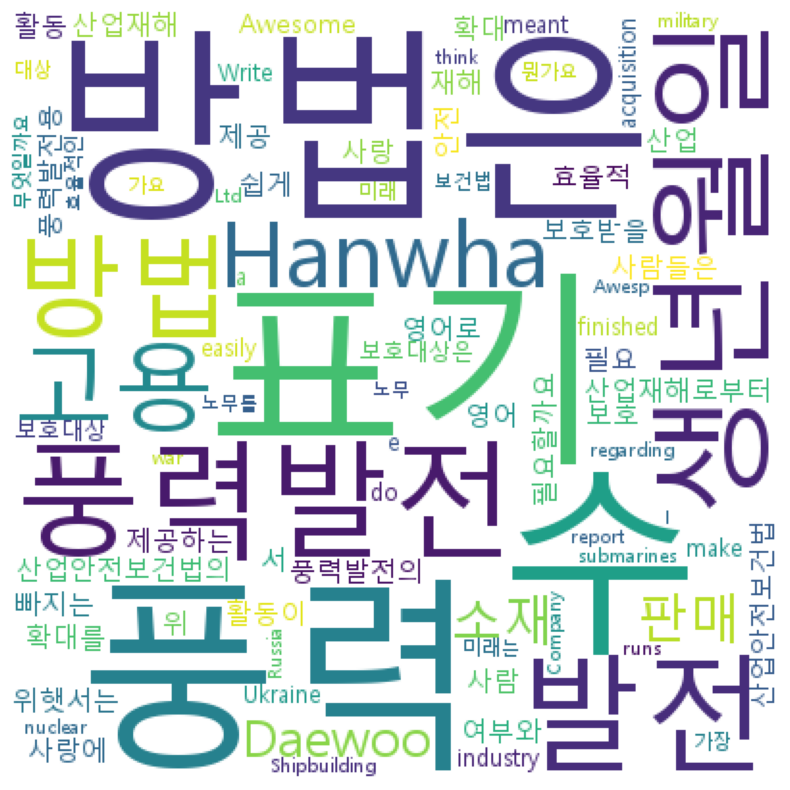

In [52]:
wc = WordCloud(random_state = 123, width = 400,
               height = 400, background_color = 'white', font_path = font_path)

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기

In [2]:
a = {'id': '61eefa80-7ed6-421f-9a4f-4e4f8bc950e4', 'generations': [{'text': '다시 제자리로 돌려주십시오.', 'tokens': 8}], 'usage': {'prompt_tokens': 125, 'generated_tokens': 8, 'total_tokens': 133}}

In [3]:
print(type(a))

<class 'dict'>


In [6]:
b = a['generations']

In [7]:
print(type(b))

<class 'list'>


In [9]:
c = b[0]

In [10]:
print(type(c))

<class 'dict'>


In [11]:
c['text']

'다시 제자리로 돌려주십시오.'

In [12]:
a['generations'][0]

{'text': '다시 제자리로 돌려주십시오.', 'tokens': 8}

In [13]:
a['generations'][0]['text']

'다시 제자리로 돌려주십시오.'

In [14]:
import pandas as pd

In [16]:
key = pd.read_excel('word_frequencies.xlsx')

In [17]:
poswiki = pd.read_excel("포스위키_질문답변 데이터_이름X.xlsx")

In [18]:
key.head()

,Word,Frequency
0,대한,98
1,LNG,80
2,포스코,68
3,현황,64
4,풍력,62


In [19]:
poswiki.head()

,대구분,중구분,소구분,부서,질문/답변,제목,내용,등록일
0,생산관리,설비기술(전기),NaN,(포항)FINEX부 FINEX2공장,질문,Motor 속도와 전력의 상관 관계에 관하여..,안녕하세요 설비 전력절감에 관심이 있어 이렇게 전문가의 도움을 좀 구하고자 합니다....,2020/10/24 18:10:06
1,생산관리,설비기술(전기),NaN,(광양)EIC기술부,답변,Motor 속도와 전력의 상관 관계에 관하여..,안녕하세요!Motor가 100을 일한다고 할 경우 이를 100kW라고 한다면 이를 ...,2020/10/26 08:03:28
2,생산관리,설비기술(전기),NaN,(광양)인사노무그룹 QSS섹션,답변,Motor 속도와 전력의 상관 관계에 관하여..,반갑습니다.전력절감하여 환경을 지키고 원가절감도 실현하면 좋겠습니다.아래 data를...,2020/10/26 08:52:15
3,CR,PR,NaN,노무협력실 노사발전그룹,질문,CR직무 관련 경력개발 문의드립니다.,"팀장님 안녕하십니까,저는노무협력실노사발전그룹에근무중인윤문건사원이라고합니다.CR 직무...",2020/11/11 07:54:48
4,CR,PR,NaN,커뮤니케이션실 홍보그룹,답변,CR직무 관련 경력개발 문의드립니다.,안녕하세요? 윤문건 사원님.우선 답변이 늦어서 죄송합니다.잦은 출장으로 답변드릴 시...,2020/12/01 13:38:06


In [27]:
poswiki_q = poswiki[poswiki['질문/답변']=='질문']

In [28]:
poswiki_q

,대구분,중구분,소구분,부서,질문/답변,제목,내용,등록일
0,생산관리,설비기술(전기),NaN,(포항)FINEX부 FINEX2공장,질문,Motor 속도와 전력의 상관 관계에 관하여..,안녕하세요 설비 전력절감에 관심이 있어 이렇게 전문가의 도움을 좀 구하고자 합니다....,2020/10/24 18:10:06
3,CR,PR,NaN,노무협력실 노사발전그룹,질문,CR직무 관련 경력개발 문의드립니다.,"팀장님 안녕하십니까,저는노무협력실노사발전그룹에근무중인윤문건사원이라고합니다.CR 직무...",2020/11/11 07:54:48
5,설비/IT,중앙정비,NaN,인사문화실 인사문화기획그룹,질문,PCP로의 성장을 고민하고 있습니다.,"저는 정비분야에서 근무하고 있는 직원입니다.설비 기술을 모두 아우를 수 있도록, 기...",2020/04/14 17:59:07
7,경영전략,경영기획,NaN,인사문화실 인사문화기획그룹,질문,경영기획 직무에 대해 알고 싶습니다.,저는 입사후 계속 마케팅에서 탄소강 제품 판매 업무만 담당해왔습니다. 주로 도금제품...,2020/04/14 17:40:23
9,마케팅,판매전략,NaN,강건재마케팅실 건설강재판매그룹 강관건재섹션,질문,국내 강건재시장 현재 및 미래,"지속적으로 인프라(SOC)산업, 공공주택, 상업빌딩이 증가하는 추세인 한국 강건재 ...",2020/11/11 13:30:47
...,...,...,...,...,...,...,...,...
15415,기타,NaN,NaN,(포항)냉연부 도금공장,질문,휴지코드 중에 BD는 무엇인가요?,"휴지코드 중에 BD는 무엇인가요?CD, SD 휴지코드는 알겠는데 BD는 무슨 약자인...",2022/09/05 18:09:38
15417,경영지원,인사,NaN,(포항)선재부 4선재공장,질문,휴직 기간중 소속,휴직 시 소속이 다른 사유가 무엇일까요?누구는 휴직 중 소속도 변경되어 소속없이 휴...,2023/06/20 15:48:14
15419,경영지원,노무/복리후생,급여,(포항)창의혁신TF팀(물류),질문,휴직기간 중 ESOP 인출이 유리할까요??,"ESOP을 살 때 소득공제를 받으면,인출 시 소득으로 기간에 따라 50%, 75% ...",2023/07/04 09:30:43
15423,구매/투자,자재구매,NaN,(포항)압연설비1부 후판정비섹션,질문,히팅건HeatingGun Q코드 알고싶습니다,히팅건 Q코드가 있다면 알고싶습니다.예시사진과 같은,2023/02/28 11:20:01


In [29]:
poswiki_q['내용'] = poswiki_q['내용'].str.replace('[^\w가-힣]', ' ', regex = True)
poswiki_q['내용']

C:\Users\piai\AppData\Local\Temp\ipykernel_4820\3704257491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poswiki_q['내용'] = poswiki_q['내용'].str.replace('[^\w가-힣]', ' ', regex = True)


0        안녕하세요 설비 전력절감에 관심이 있어 이렇게 전문가의 도움을 좀 구하고자 합니다 ...
3        팀장님 안녕하십니까 저는노무협력실노사발전그룹에근무중인윤문건사원이라고합니다 CR 직무...
5        저는 정비분야에서 근무하고 있는 직원입니다 설비 기술을 모두 아우를 수 있도록  기...
7        저는 입사후 계속 마케팅에서 탄소강 제품 판매 업무만 담당해왔습니다  주로 도금제품...
9        지속적으로 인프라 SOC 산업  공공주택  상업빌딩이 증가하는 추세인 한국 강건재 ...
                               ...                        
15415    휴지코드 중에 BD는 무엇인가요 CD  SD 휴지코드는 알겠는데 BD는 무슨 약자인...
15417    휴직 시 소속이 다른 사유가 무엇일까요 누구는 휴직 중 소속도 변경되어 소속없이 휴...
15419    ESOP을 살 때 소득공제를 받으면 인출 시 소득으로 기간에 따라 50   75  ...
15423                         히팅건 Q코드가 있다면 알고싶습니다 예시사진과 같은
15425    저번주 월요일 힌남노로 인해 상주 정비 근무시간이 08 00 12 00  20 00...
Name: 내용, Length: 6069, dtype: object

In [32]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\piai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
kkma = konlpy.tag.Kkma()

def mixed_nouns(text):
    # 한글 형태소 분석
    ko_nouns = kkma.nouns(text)
    # 영어 단어 토큰화
    en_nouns = word_tokenize(text)
    # 영어와 한글 결과 병합
    return ko_nouns + en_nouns
nonus_poswiki = poswiki_q['내용'].apply(mixed_nouns)

TypeError: No matching overloads found for kr.lucypark.kkma.KkmaInterface.extractNoun(float), options are:
	public org.snu.ids.ha.index.KeywordList kr.lucypark.kkma.KkmaInterface.extractNoun(java.lang.String)



In [ ]:
df_word_bottom = pd.DataFrame({'word_bottom' : nonus_poswiki})
df_word_bottom['count'] = df_word_bottom['word_bottom'].str.len()
df_word_bottom = df_word_bottom.query('count >= 2')
df_word_bottom